# Analysis of top stocks across sectors


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Pulling stock data 

In [2]:
stocks = ['AAPL', 'ADBE', 'IBM', 'MSFT', 'DIS','FB','GOOGL', 'TGT', 'AMZN', 'HD', 'BABA', 'PG', 'WMT', 'COST', '^GSPC']
data = pd.DataFrame()
for i in range(len(stocks)):
    
    df = wb.DataReader(stocks[i], data_source='yahoo', start='2015-5-1', end = '2020-5-1')
    df['stock'] = stocks[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,ADBE,AMZN,BABA,COST,DIS,FB,GOOGL,HD,IBM,MSFT,PG,TGT,WMT,^GSPC
Date,,,,,,,,,,,,,,,
2015-05-01,118.347084,76.430000,422.869995,81.169998,132.516785,103.006111,78.989998,551.159973,97.696198,137.626236,43.754124,68.751656,67.165184,69.163589,2108.290039
2015-05-04,118.117645,75.849998,423.040009,80.589996,132.844955,103.481445,78.809998,552.840027,98.150993,137.863968,43.376461,68.803040,67.612122,69.673965,2114.489990
2015-05-05,115.456108,75.000000,421.190002,79.540001,131.705673,103.276398,77.559998,543.039978,96.367409,137.158676,42.800987,68.563293,66.591797,68.750000,2089.459961
2015-05-06,114.731071,74.480003,419.100006,80.000000,131.951767,102.260513,78.099998,535.080017,96.590363,135.777344,41.614067,68.845863,66.718269,68.758858,2080.149902
2015-05-07,115.440712,74.730003,426.880005,86.000000,131.760269,101.831779,78.430000,542.039978,98.133163,137.579651,41.991734,68.674614,67.553101,69.095367,2088.000000


In [3]:
sec_returns = np.log( table / table.shift(1) )

In [4]:
cov = sec_returns.cov() * 250
cov

,AAPL,ADBE,AMZN,BABA,COST,DIS,FB,GOOGL,HD,IBM,MSFT,PG,TGT,WMT,^GSPC
AAPL,0.082189,0.055192,0.047955,0.047079,0.029636,0.037456,0.051217,0.049721,0.041089,0.038086,0.055504,0.025304,0.028530,0.022633,0.041614
ADBE,0.055192,0.095033,0.056527,0.048844,0.031754,0.036960,0.057228,0.055796,0.045716,0.040582,0.065178,0.023918,0.029289,0.024163,0.043704
AMZN,0.047955,0.056527,0.087800,0.049978,0.025430,0.028208,0.058173,0.052590,0.032896,0.031458,0.053745,0.018264,0.020321,0.018952,0.034091
BABA,0.047079,0.048844,0.049978,0.104032,0.017601,0.027450,0.049136,0.046277,0.029106,0.031521,0.046791,0.013353,0.017739,0.013704,0.033263
COST,0.029636,0.031754,0.025430,0.017601,0.045098,0.022539,0.023457,0.026051,0.028597,0.022814,0.030580,0.020511,0.031289,0.026998,0.024382
DIS,0.037456,0.036960,0.028208,0.027450,0.022539,0.063963,0.032794,0.033599,0.037063,0.033628,0.037695,0.022044,0.025090,0.017790,0.033620
FB,0.051217,0.057228,0.058173,0.049136,0.023457,0.032794,0.099704,0.058338,0.039682,0.032108,0.054174,0.019452,0.021609,0.017566,0.038312
GOOGL,0.049721,0.055796,0.052590,0.046277,0.026051,0.033599,0.058338,0.071735,0.038156,0.035676,0.055113,0.021827,0.022896,0.018738,0.037960
HD,0.041089,0.045716,0.032896,0.029106,0.028597,0.037063,0.039682,0.038156,0.064615,0.036721,0.044247,0.023908,0.035955,0.024356,0.037996
IBM,0.038086,0.040582,0.031458,0.031521,0.022814,0.033628,0.032108,0.035676,0.036721,0.061730,0.040737,0.024608,0.027447,0.021219,0.034813


**Beta:**
### $$ 
\beta_{pg} = \frac{\sigma_{pg,m}}{\sigma_{m}^2}
$$

In [5]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.03588294351696495

In [6]:
stock_table = pd.DataFrame( stocks, columns = ['stocks'])
beta_list = []

for i in range(len(stocks)):
    cov_with_market =  cov.iloc[i,14]
    beta = cov_with_market / market_var
    beta_list.append(beta)

stock_table['beta'] = beta_list

**Calculate the expected return (CAPM):**
### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$


 - 10 Year Treasury Rate: 0.73% for May 2020 (rf = 0.0073)
 - Risk premium = 0.05


In [7]:
capm_list = []

for i in range(len(stocks)):
    beta = stock_table.beta[i]
    capm = 0.0073 + beta * 0.05
    capm = capm*100 
    capm_list.append(capm)

stock_table['CAPM'] = capm_list
stock_table = stock_table[:14]

**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [8]:
sharpe_ratio_list = []

for i in range(len(stock_table)):
    Sharpe = ((stock_table['CAPM'][i]/100) - 0.0073) / (sec_returns[stock_table['stocks'][i]].std() * 250 ** 0.5)
    sharpe_ratio_list.append(Sharpe*100)
    
stock_table['Sharpe_ratio'] = sharpe_ratio_list

In [9]:
stock_table.sort_values(by = 'Sharpe_ratio') 

,stocks,beta,CAPM,Sharpe_ratio
4,DIS,0.679481,4.127406,13.433290
13,COST,0.574628,3.603139,13.529339
5,FB,0.936927,5.414634,14.836053
11,PG,0.651139,3.985693,16.304310
12,WMT,0.733030,4.395152,16.478014
3,MSFT,0.927000,5.365000,17.047747
7,TGT,1.057880,6.019402,17.584304
8,AMZN,1.058889,6.024445,17.867850
10,BABA,1.207221,6.766104,18.714273
9,HD,0.970189,5.580947,19.083617


Text(0, 0.5, 'price in $')

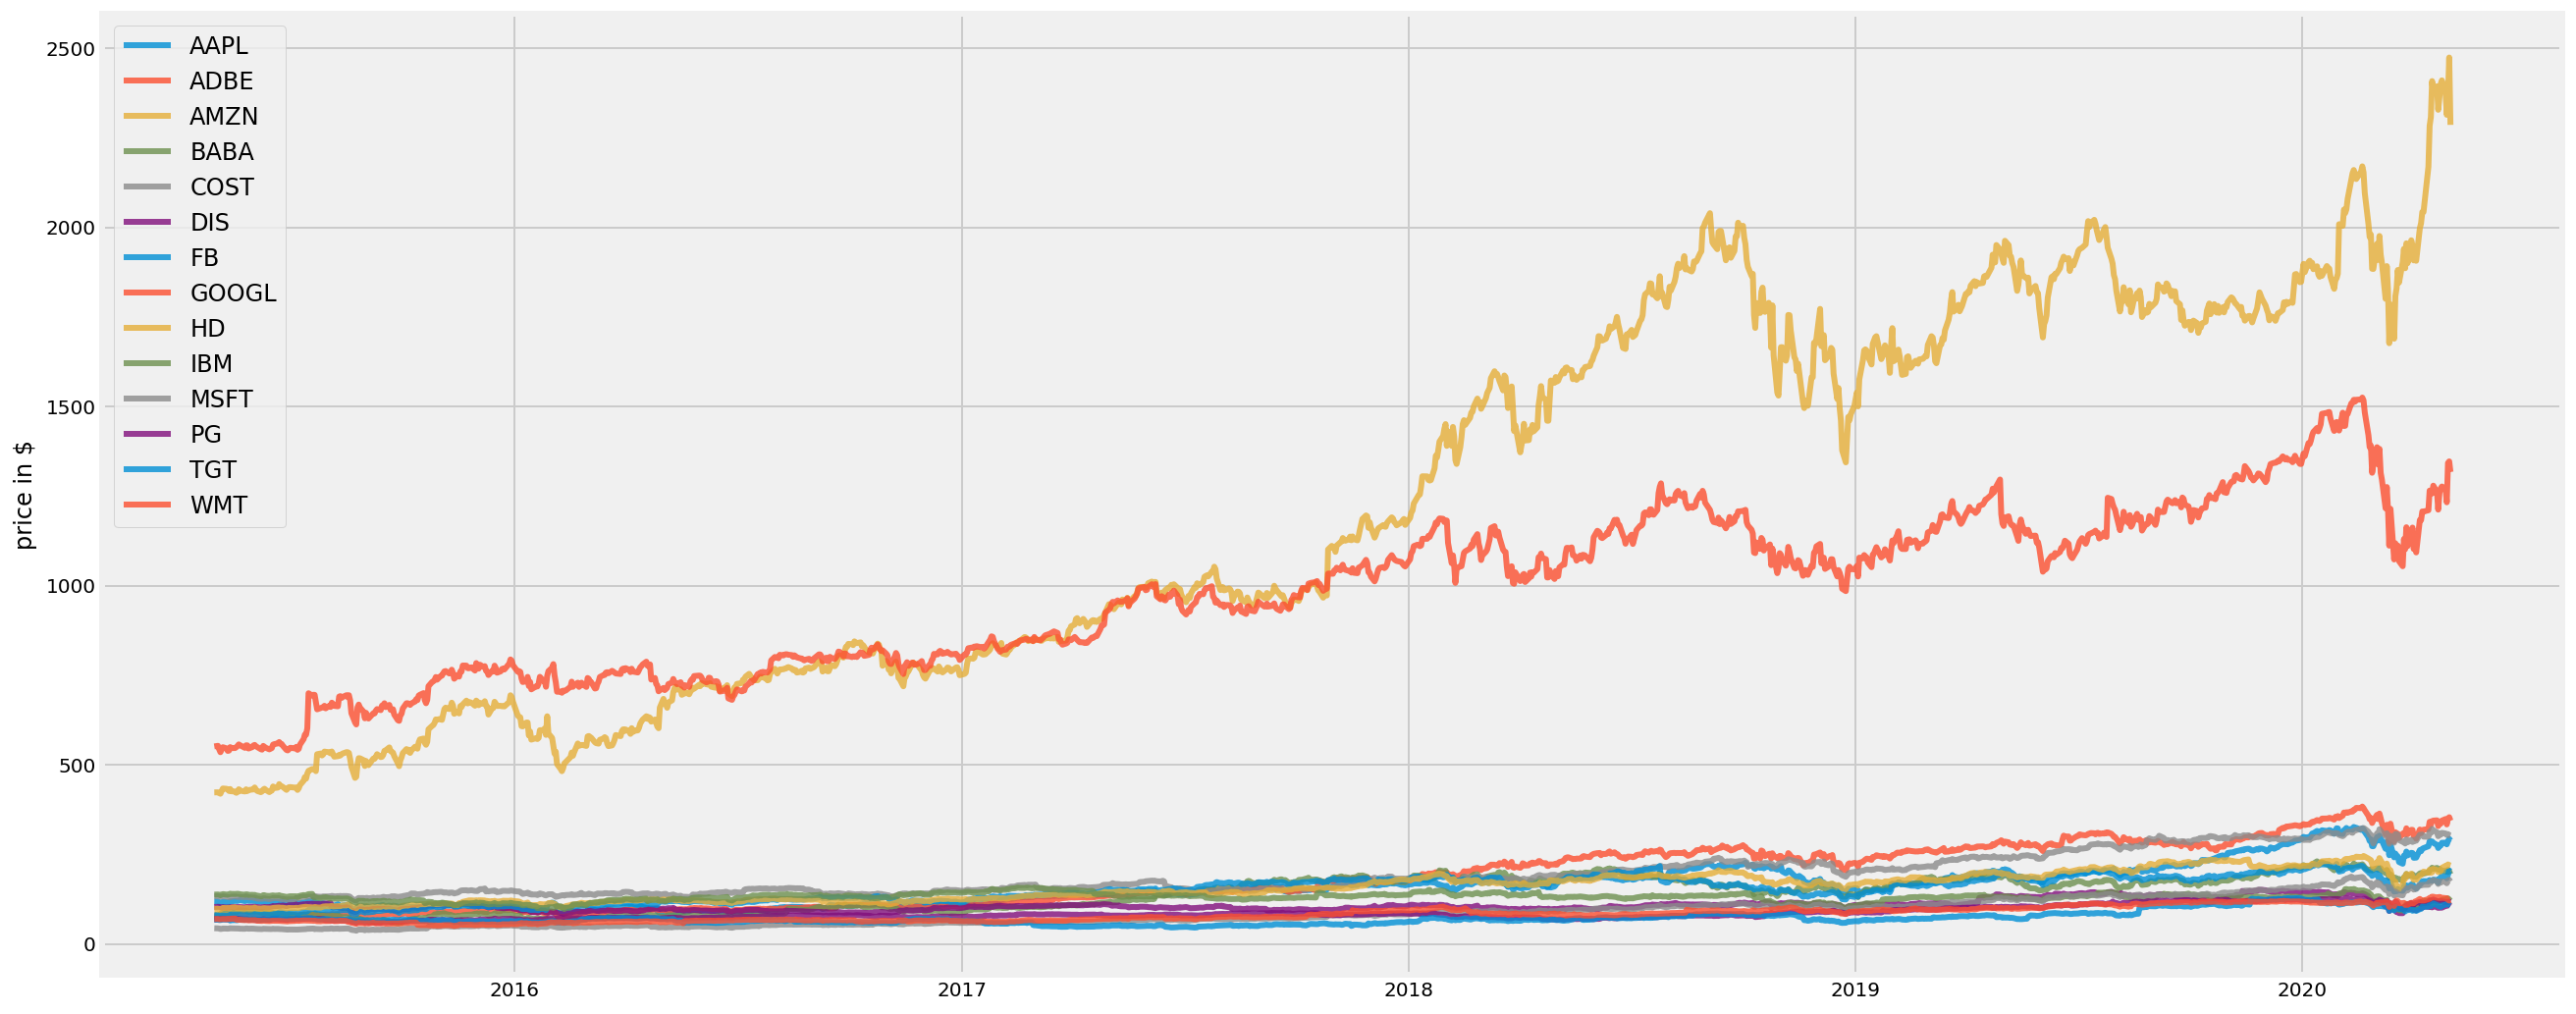

In [10]:
table = table.drop(columns = ['^GSPC'])
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

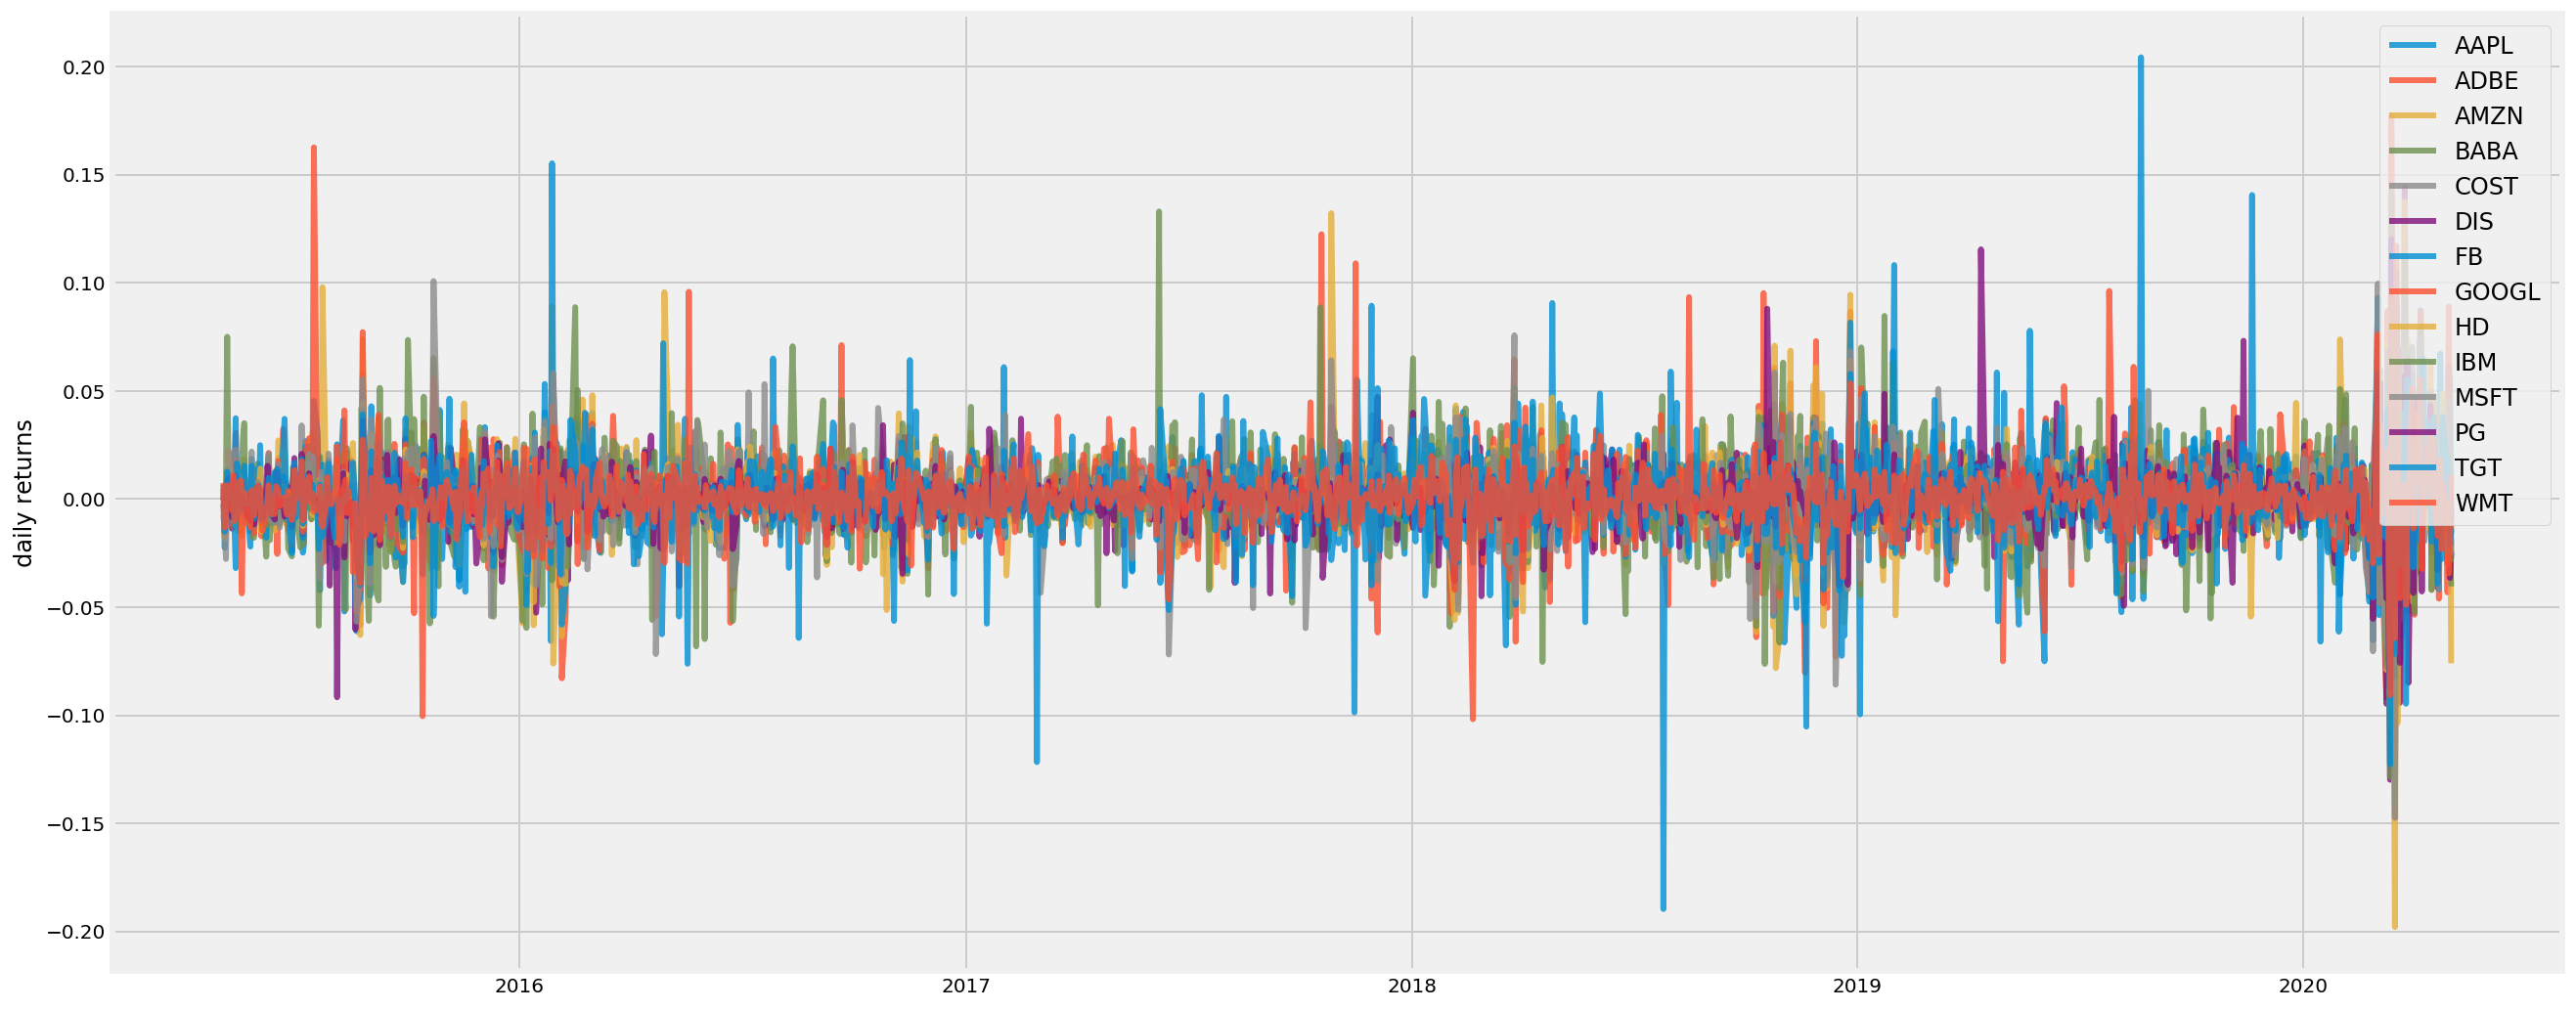

In [11]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### Log returns

Text(0, 0.5, 'daily log returns')

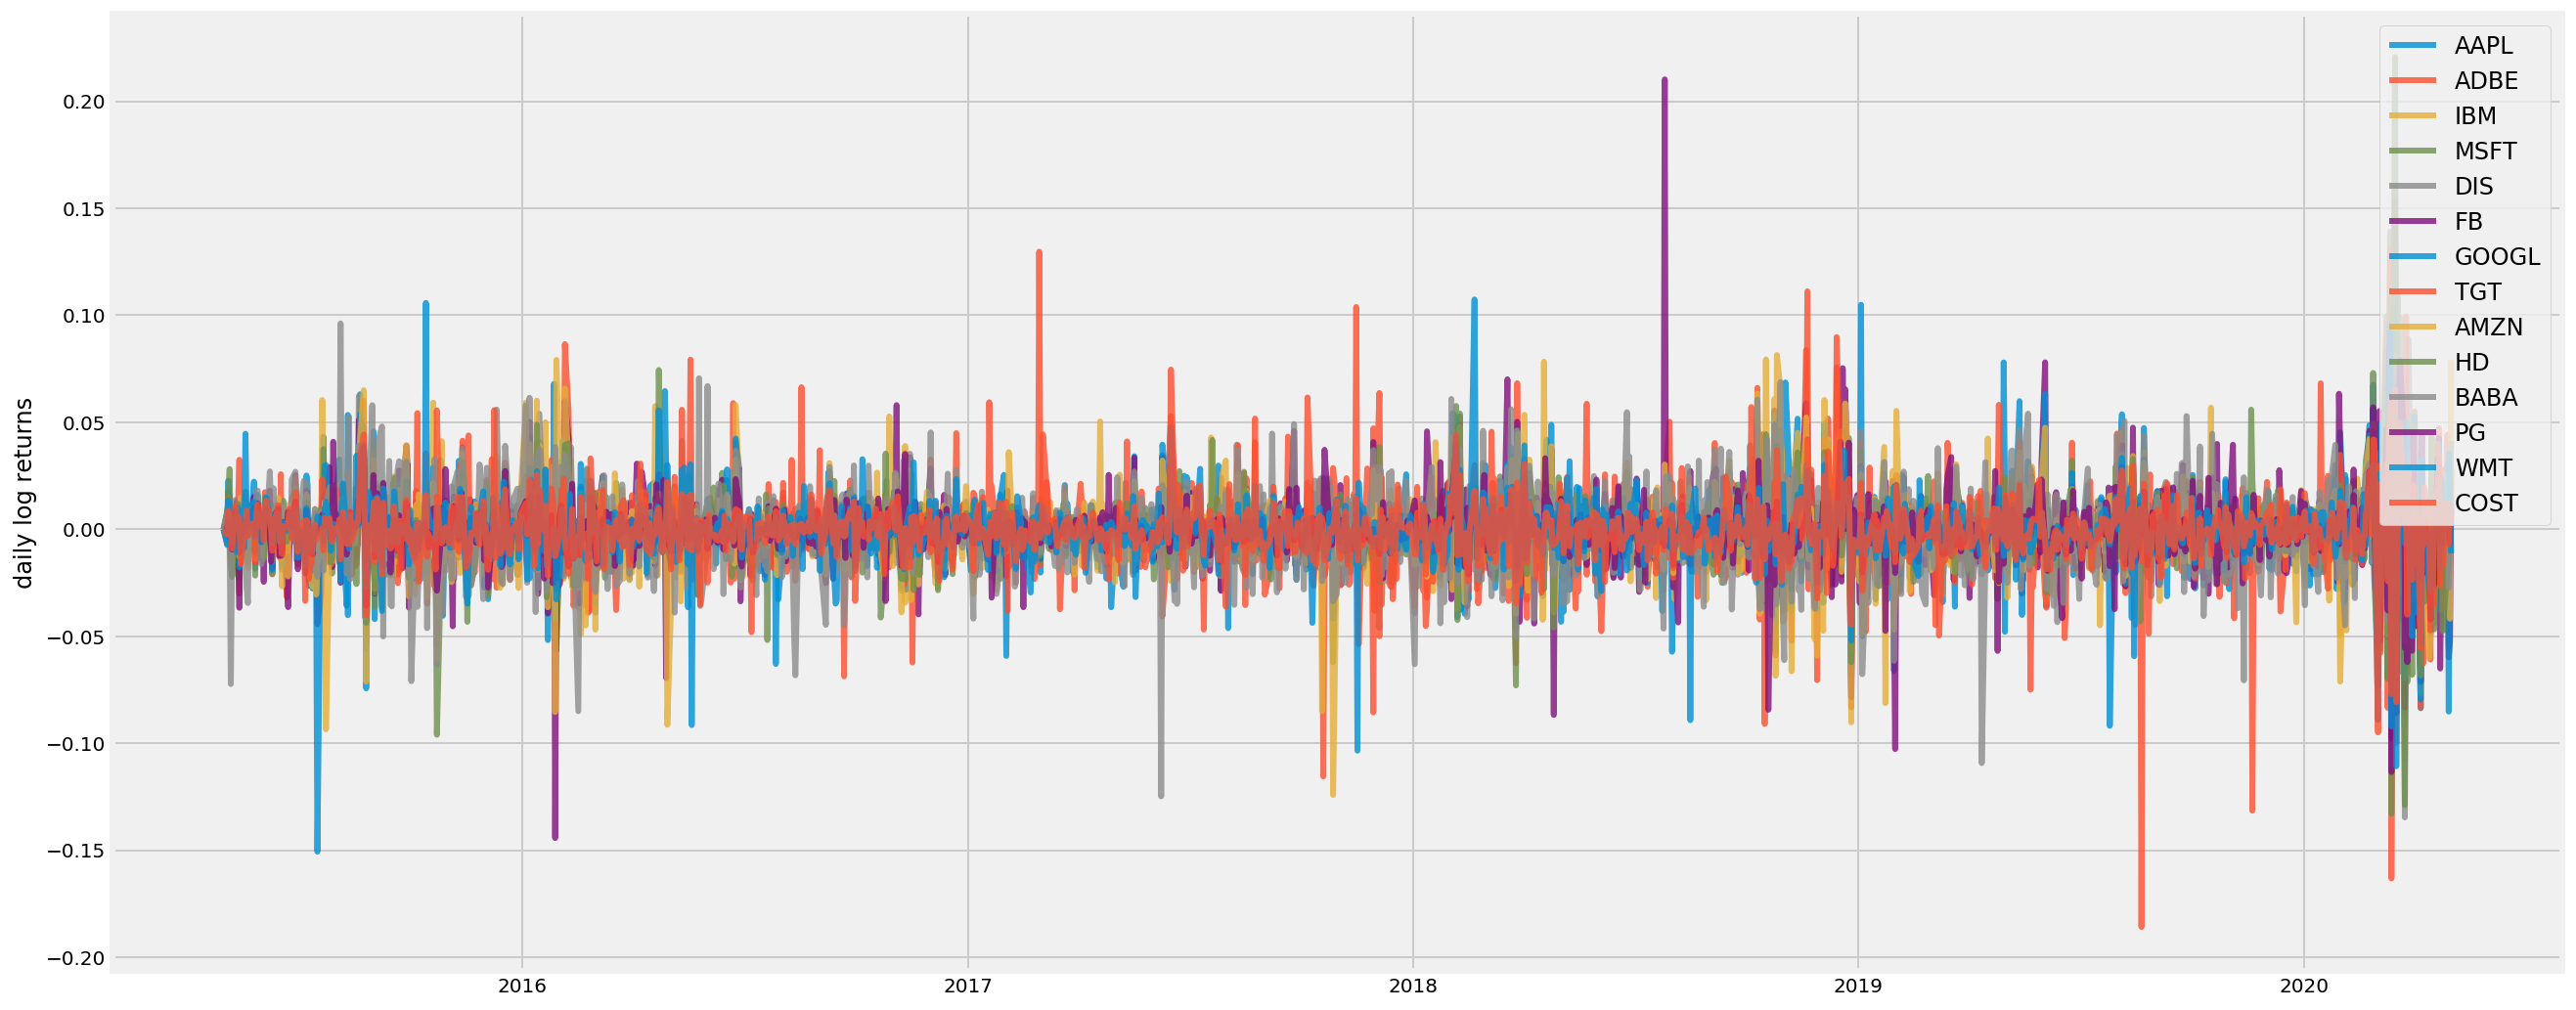

In [12]:
stocks = ['AAPL', 'ADBE', 'IBM', 'MSFT', 'DIS','FB','GOOGL', 'TGT', 'AMZN', 'HD', 'BABA', 'PG', 'WMT', 'COST']
log = pd.DataFrame(columns = stocks, index = table.index)

for i in range(len(stocks)):
    log_list = []
    for j in range(len(table[stocks[i]])):
        if(j+1<len(table[stocks[i]])):
            log_returns =  np.log(table[stocks[i]][j]) - np.log(table[stocks[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[stocks[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

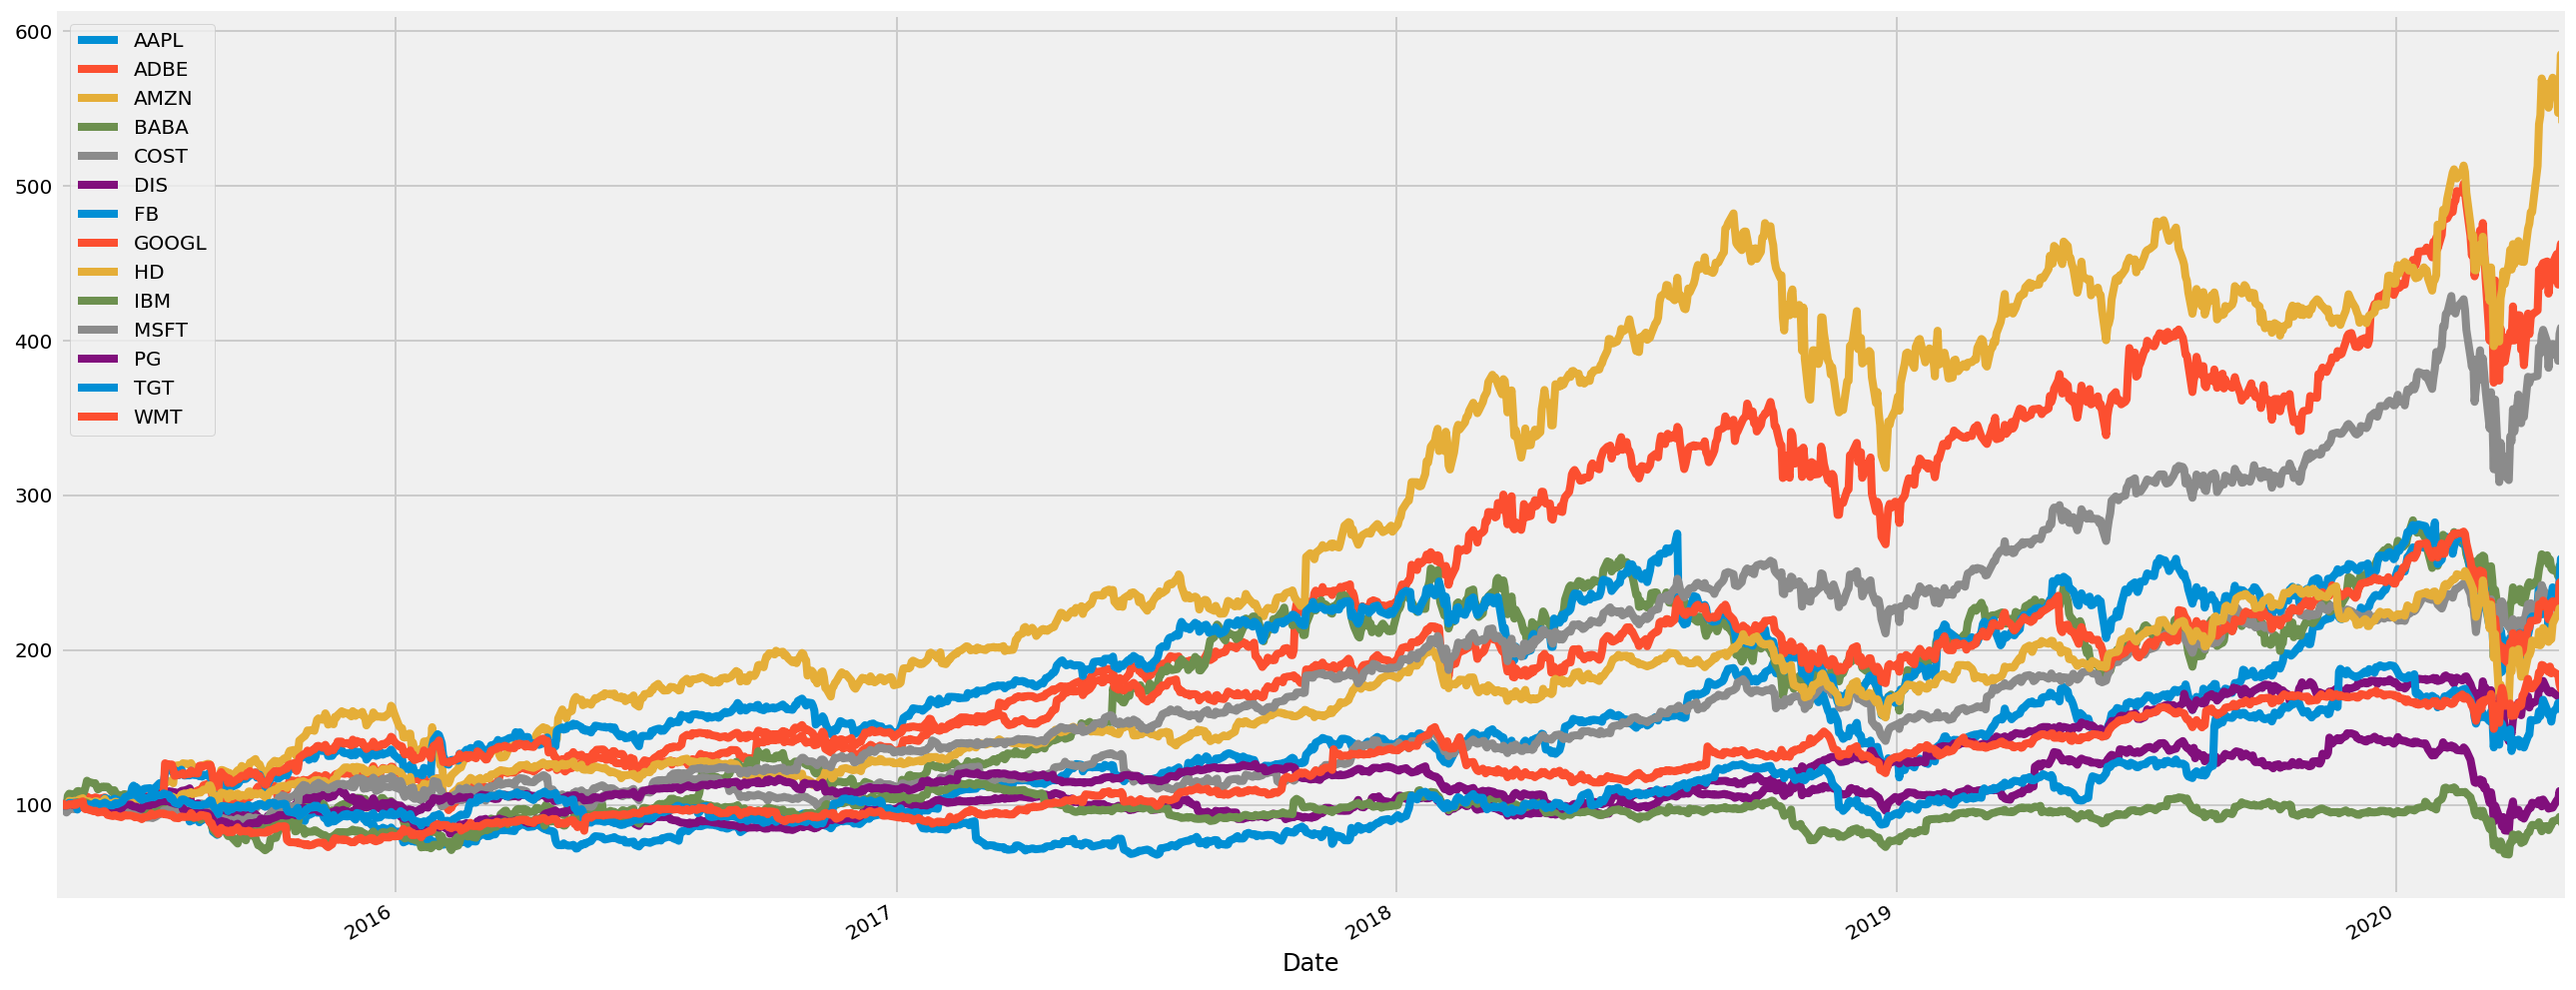

In [13]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

“portfolio_annualised_performance” function will calculate the returns and volatility, and to make it as an annualised calculation I take into account 252 as the number of trading days in one year. “random_portfolios” function will generate portfolios with random weights assigned to each stock, and by giving num_portfolios argument, you can decide how many random portfolios you want to generate.

In [14]:

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(14)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return(results, weights_record)

mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 50000
risk_free_rate = 0.0073

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.27
Annualised Volatility: 0.21


            AAPL   ADBE   AMZN   BABA  COST   DIS    FB  GOOGL    HD   IBM  \
allocation  3.12  19.31  23.12  13.11  14.3  1.89  1.91   3.27  5.47  1.81   

            MSFT    PG   TGT   WMT  
allocation  3.35  2.63  2.06  4.66  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.16
Annualised Volatility: 0.17


            AAPL  ADBE  AMZN  BABA   COST   DIS    FB  GOOGL   HD   IBM  MSFT  \
allocation  5.78  0.77  0.82  9.47  18.36  3.92  6.99   3.03  4.0  7.19   2.1   

               PG   TGT   WMT  
allocation  19.39  10.5  7.68  


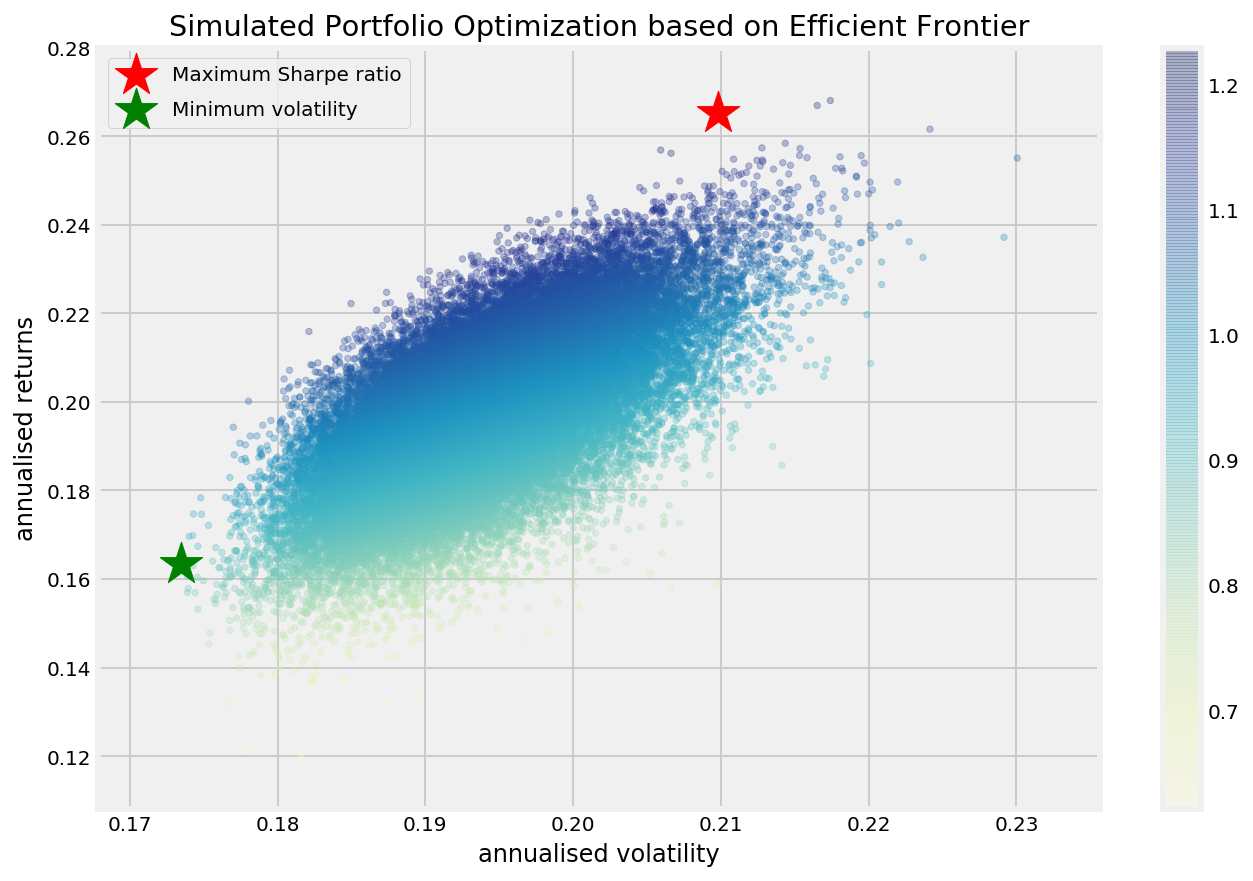

In [15]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)